# **Análisis exploratorio y estadística**
# AE13 - Introducción a las técnicas de EDA - Analizando Car Features


## <font color='blue'>**Introducción**</font>

**¿Qué es el análisis exploratorio de datos?**
El análisis exploratorio de datos (EDA por sus siglas en inglés) implica el uso de gráficos y visualizaciones para explorar y analizar un conjunto de datos. El objetivo es explorar, investigar y aprender, no confirmar hipótesis estadísticas. Con el EDA, se pueden hallar anomalías en los datos, como valores atípicos u observaciones inusuales, revelar patrones, comprender posibles relaciones entre variables y generar preguntas o hipótesis interesantes que se pueden comprobar más adelante mediante métodos estadísticos más formales.

Como el EDA implica explorar, es un proceso iterativo. Lo más probable es que se averigüen diferentes aspectos sobre los datos a partir de diferentes gráficos. Los objetivos típicos son comprender:

* La distribución de variables en su conjunto de datos. Esto es, ¿cuál es la
forma de sus datos? ¿Está sesgada la distribución? ¿Tiene forma de montículo? ¿Es bimodal?
* Las relaciones entre variables. Si sus datos tienen o no valores atípicos o puntos inusuales puede indicar problemas de calidad de los datos o conducir a descubrimientos interesantes.
* Si sus datos tienen o no patrones temporales.


**¿Cuándo debo utilizarlo?**
El análisis exploratorio de datos es una potente herramienta para explorar un conjunto de datos. Incluso cuando su objetivo es efectuar análisis planificados, el EDA puede utilizarse para limpiar datos, para análisis de subgrupos o simplemente para comprender mejor los datos. Un paso inicial importante en cualquier análisis de datos es representar los datos gráficamente.

**¿Cómo realizar análisis de datos exploratorios?**

Esta es una de esas preguntas que todos están interesados en conocer la respuesta. Bueno, la respuesta asi como en cualquier proyecto de ciencia de datos,  es que depende del conjunto de datos en el que esté trabajando. No existe un método o métodos comunes para realizar EDA, sin embargo en este notebook veremos algunos métodos y técnicas de uso frecuente en el proceso de EDA.

**¿Qué datos estamos explorando hoy?**

El primer conjunto de datos que exploraremos es sobre autos. El conjunto de datos se puede descargar desde [Car Features and MSRP](https://www.kaggle.com/CooperUnion/cardataset). El conjunto de datos, tiene aproximadamente 12.000 filas y 16 columnas, las cuales contienen características automóviles tales como: marca, modelo, tipo de combustible, potencia del motor, tipo de transmisión, rendimiento de combustible en carretera y ciudad (en millas por galón, MPG), entre otras.

En este tutorial, exploraremos los datos y los prepararemos para el modelado.

## <font color='blue'>**Importando las librerias necesarias**</font>

Usualmente para realizar EDA, necesitaremos 4 librerías. La librería `NumPy` para todo lo que necesitemos realizar con matrices y álgebra lineal. `Pandas` para realizar el procesamniento del dataset, ordenarlo, agruparlo, integrarlo con otro dataset o filtrarlo. Finalmente, todo el proceso de visualización, utilizaremos principalemnte dos librerías `Seaborn` y `matplotlib`.

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns                       #Visualizacion
import matplotlib.pyplot as plt             #visualization
%matplotlib inline

## <font color='blue'>**Vamos a cargar los datos**</font>


Utilizaremos `Pandas` para cargar los datos en un DataFrame para su procesamiento. Por la extensión del archivo, podemos ver que los mismos vienen en formato `.csv` (separados por comas).

In [37]:
# Con esto debe dar permiso a google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Aqui debe cargar su ruta
#path = '/content/drive/MyDrive/TalentoDigital_Mk_III/Material_clases_CD_AD/M03-Analisis_exploratorio_estadistica/data/'
path = '/content/drive/MyDrive/MODULO 3 - ANÁLISIS EXPLORATORIO Y ESTADÍSTICA/'
df = pd.read_csv(path + "data.csv")
# despleguemos las primeras 10 columnas, transpuestas
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Make,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011,2012,2012,2012,2012,2013
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0,230.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury,"Luxury,Performance","Luxury,Performance","Luxury,High-Performance",Luxury,Luxury


Es una buena práctica mirar la cola del archivo y ver que en ella se mantiene la estructura de los datos.

In [40]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## <font color='blue'>**Verificando el tipo de dato**</font>


Aquí verificamos los tipos de datos, porque a veces algunos atributos no se almacenan con el tipo de dato correcto. Esto es importante al momento de realizar las visualizaciones. Al realizar la comparacion con los datos vemos que se han cargado de forma correcta.

__Nota:__ cada vez que `Pandas` no es capaz de interpretar adecuadamente una columna o, incluso un único dato dentro de una columna, le asignará el tipo `object` a toda la columna.


In [41]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


## <font color='blue'>**Renombrando columnas**</font>

Vemos varios  nombres de las columnas son confusos de leer, así que es mejor modificar los nombres de las columnas.

In [42]:
df = df.rename(columns={"Engine HP": "HP",
                        "Engine Cylinders": "Cylinders",
                        "Transmission Type": "Transmission",
                        "Driven_Wheels": "Drive Mode",
                        "highway MPG": "MPG-H",
                        "city mpg": "MPG-C",
                        "MSRP": "Price" }) # Manufacturer's Suggested Retail Price
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## <font color='blue'>**Eliminando filas duplicadas**</font>

Verifiquemos y eliminamos filas duplicadas.

In [43]:
df.shape

(11914, 16)

In [44]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
11909,False
11910,False
11911,False
11912,False


In [45]:
duplicate_rows_df = df[df.duplicated()]
print("Numero de filas duplicadas: ", duplicate_rows_df.shape[0])

Numero de filas duplicadas:  715


In [46]:
# Contamos las filas que hay en cada columna
df.count()

,0
Make,11914
Model,11914
Year,11914
Engine Fuel Type,11911
HP,11845
Cylinders,11884
Transmission,11914
Drive Mode,11914
Number of Doors,11908
Market Category,8172


In [47]:
# Eliminamos las filas duplicadas
df = df.drop_duplicates()

In [48]:
# Y volvemos a contar
df.count()

,0
Make,11199
Model,11199
Year,11199
Engine Fuel Type,11196
HP,11130
Cylinders,11169
Transmission,11199
Drive Mode,11199
Number of Doors,11193
Market Category,7823


## <font color='blue'>**Valores nulos**</font>

Este es un paso importante también y existen distintos métodos de completar los datos faltantes. Cuando el porcentaje de datos nulos es bajo, uno puede probar eliminando los registros y evaluar si es que algunos de los eliminados son relevantes. En caso de no eliminar los registros las formas más frecuentes de agregar un valor es incoprporar la media, mediana, sobre el total de la problación o respecto de un número de vecinos cercanos.  En este caso, veremos una columna con una cantidad significativa de datos faltantes (Market Category), la cual, en esta oportunidad decidiremos eliminar. Para el resto de  columnas con valores nulos, realizaremos una imputación.

**Nota**: Utilizaremos la librería ***Missingno***, la cual es una excelente biblioteca de Python, fácil de usar, y que proporciona una serie de visualizaciones para comprender la presencia y distribución de los datos faltantes dentro de un marco de datos de pandas. Esto puede ser en forma de gráfico de barras, gráfico de matriz, mapa de calor o dendrograma.

El método `info()` nos entrega una excelente visión de los `non-null`.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11199 non-null  object 
 1   Model             11199 non-null  object 
 2   Year              11199 non-null  int64  
 3   Engine Fuel Type  11196 non-null  object 
 4   HP                11130 non-null  float64
 5   Cylinders         11169 non-null  float64
 6   Transmission      11199 non-null  object 
 7   Drive Mode        11199 non-null  object 
 8   Number of Doors   11193 non-null  float64
 9   Market Category   7823 non-null   object 
 10  Vehicle Size      11199 non-null  object 
 11  Vehicle Style     11199 non-null  object 
 12  MPG-H             11199 non-null  int64  
 13  MPG-C             11199 non-null  int64  
 14  Popularity        11199 non-null  int64  
 15  Price             11199 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usa

Vemos que la columna `Market Category` tiene una cantidad significativa de nulos. Veamos esto con la librería __Missingno__.

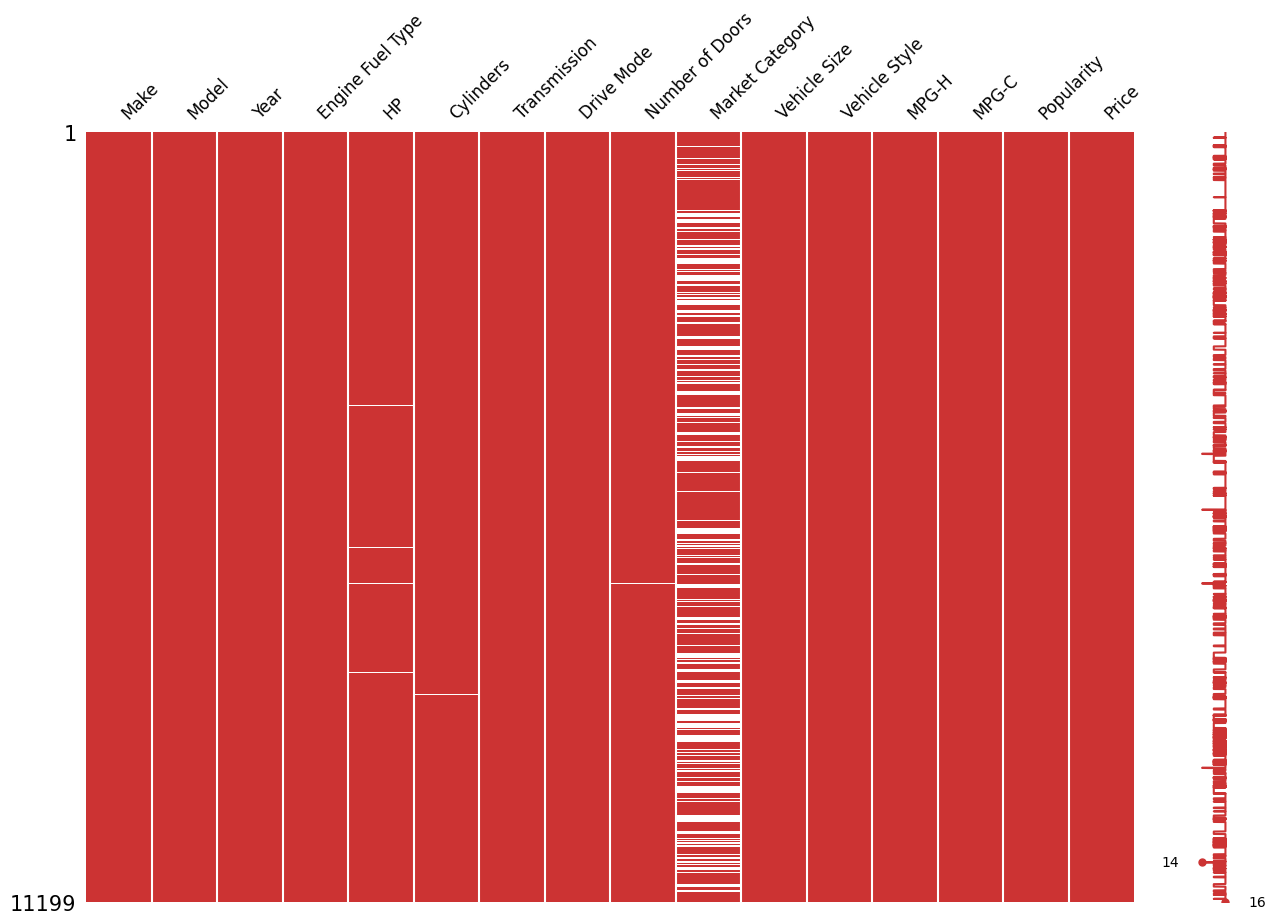

In [50]:
import missingno as msno
%matplotlib inline

# Primero la función matrix
msno.matrix(df, figsize=(15, 10), color=(0.8,0.2,0.2), fontsize=12)
plt.show()

El __gráfico de matriz__ es una gran herramienta si está trabajando con datos muy relacionados entre sí o con series de tiempo. Proporciona un relleno de color para cada columna. Cuando hay datos presentes, el gráfico se sombrea en gris (o el color de su elección), y cuando está ausente, el gráfico se muestra en blanco.

En el lado derecho de la gráfica hay un minigráfico que va desde 0 a la izquierda hasta el número total de columnas en el marco de datos a la derecha. Cuando una fila tiene un valor en cada columna, la línea estará en la posición máxima derecha. A medida que los valores faltantes comienzan a aumentar dentro de esa fila, la línea se moverá hacia la izquierda.

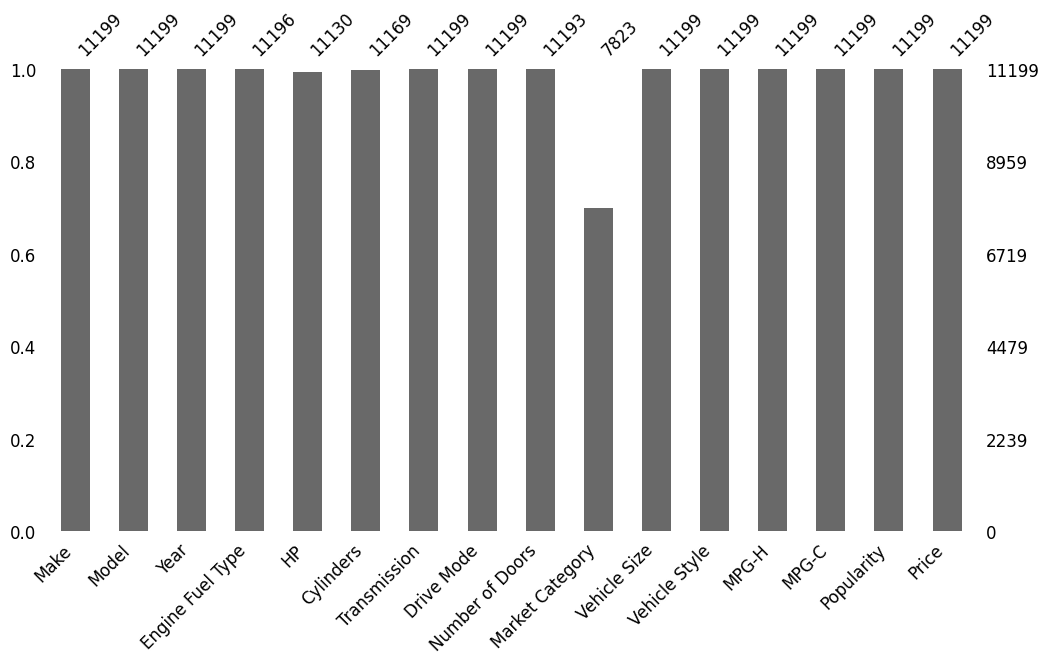

In [51]:
# Segundo la función bar
msno.bar(df, figsize=(12, 6), fontsize=12)
plt.show()

El __gráfico de barras__ proporciona un gráfico simple donde cada barra representa una columna dentro del marco de datos. La altura de la barra indica qué tan completa está esa columna, es decir, cuántos valores no nulos están presentes.

En el lado izquierdo de la gráfica, la escala del eje Y varía de 0,0 a 1,0, donde 1,0 representa el 100 % de la integridad de los datos. Si la barra es menor que esto, indica que nos faltan valores dentro de esa columna.

En el lado derecho de la gráfica, la escala se mide en valores de índice. Con la esquina superior derecha representando el número máximo de filas dentro del set de datos.

A lo largo de la parte superior de la gráfica, hay una serie de números que representan el recuento total de los valores no nulos dentro de esa columna.

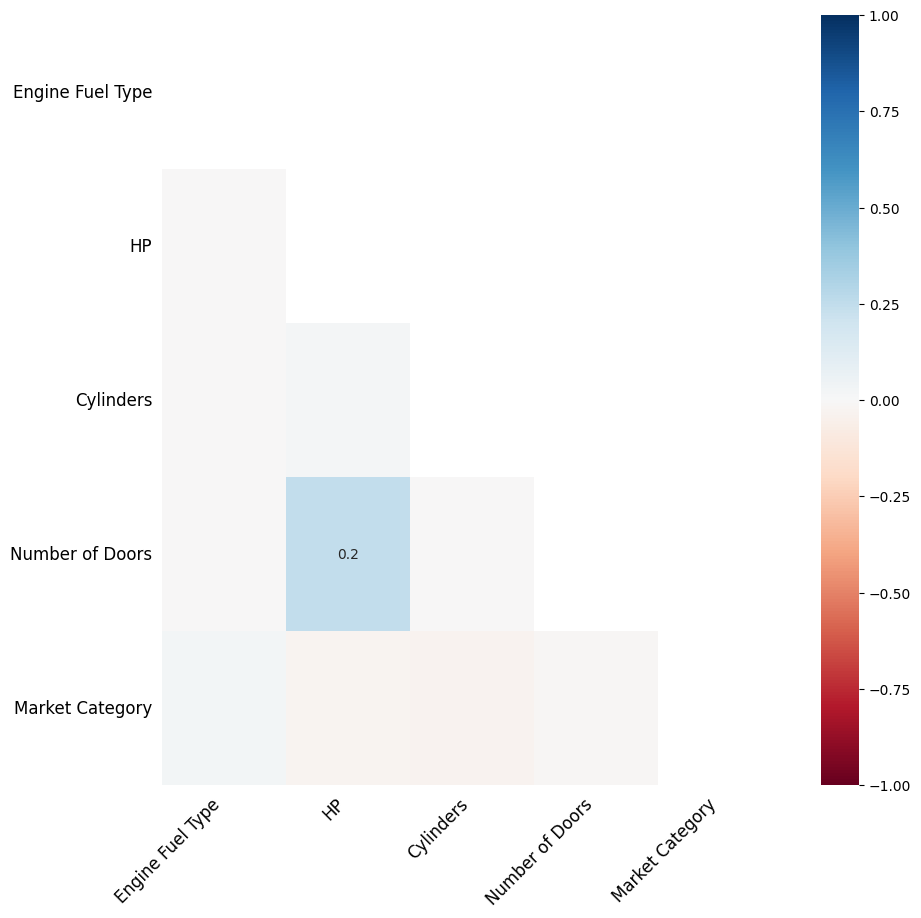

In [52]:
# Tercero la función heatmap
msno.heatmap(df, figsize=(10,10), fontsize=12)
plt.show()

El __mapa de calor__ se utiliza para identificar correlaciones de nulidad entre cada una de las diferentes columnas. En otras palabras, se puede utilizar para identificar si existe una relación en presencia de valores nulos entre cada una de las columnas.

Los valores cercanos a 1 positivo indican que la presencia de valores nulos en una columna está correlacionada con la presencia de valores nulos en otra columna.

Los valores cercanos a 1 negativo indican que la presencia de valores nulos en una columna no está correlacionada con la presencia de valores nulos en otra columna. En otras palabras, cuando hay valores nulos en una columna, hay valores de datos en la otra columna y viceversa.

Los valores cercanos a 0 indican que hay poca o ninguna relación entre la presencia de valores nulos en una columna en comparación con otra.

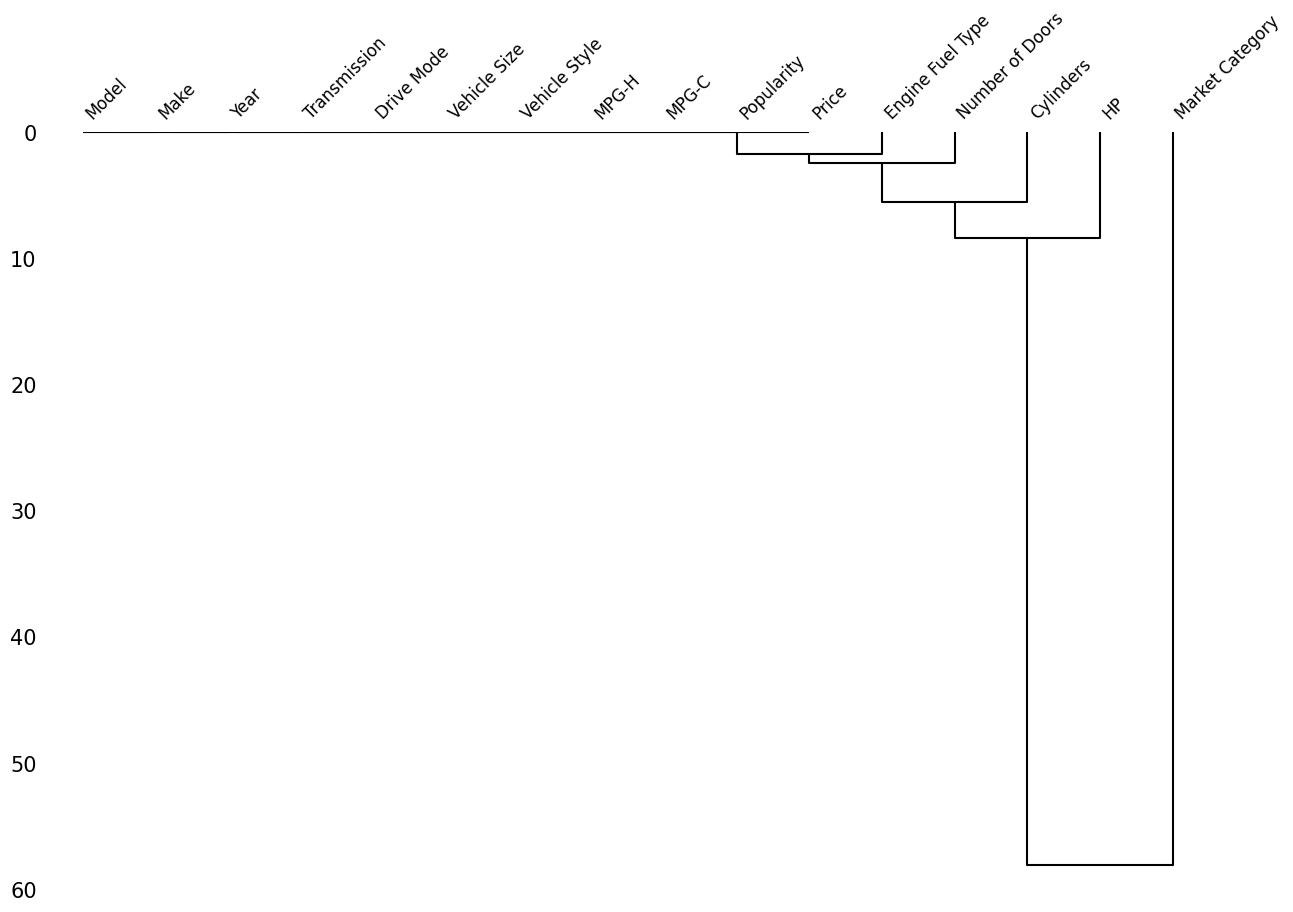

In [53]:
# Y por último la dunción dendrogram
msno.dendrogram(df, figsize=(15,10), fontsize=12)
plt.show()

El __gráfico de dendrograma__ proporciona un gráfico similar a un árbol generado a través de la agrupación jerárquica y agrupa columnas que tienen fuertes correlaciones en la nulidad.

Si varias columnas se agrupan en el nivel cero, la presencia de valores nulos en una de esas columnas está directamente relacionada con la presencia o ausencia de valores nulos en las otras columnas.

Cuanto más separadas estén las columnas en el árbol, menos probable es que los valores nulos puedan correlacionarse entre las columnas.

Tal como dijimos, eliminaremos la columna `Market Category`. Atención que hay que ser muy cuidadosos con la decisión de eliminar columnas.

In [54]:
df = df.drop(['Market Category'], axis=1)

In [55]:
# Verificamos nuevamente los nulos
print(df.isnull().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64


### <font color='green'>**Actividad 1**</font>

1. Realice una imputación de datos utilizando la media para las variables `HP` y `Cylinders`.
2. Elimine las filas restantes que tengan valores nulos.


In [56]:
# Imaginen que queremos imputar los datos de los cilindros faltantes
# utilizando la moda
df.Cylinders.mode()

,Cylinders
0,4.0


In [57]:
# Un error frecuente es intentar realizar una asignación encadenada
# la cual genera vista de nuestro dataframe
# esta operación genera un Warning: SettingWithCopyWarning
df.Cylinders[df.Cylinders.isnull()] = df.Cylinders.mode()

<ipython-input-57-cfcff536a0b1>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Cylinders[df.Cylinders.isnull()] = df.Cylinders.mode()
<ipython-input-57-cfcff536a0b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [58]:
# lo peor de todo es que la operción que intentamos no se realizaó
# independientemente que solo fuera un Warning
df.Cylinders[df.Cylinders.isnull()]

,Cylinders
1983,NaN
1984,NaN
3716,NaN
3717,NaN
3718,NaN
3719,NaN
5778,NaN
5779,NaN
5780,NaN
8373,NaN


In [59]:
# la solución es combinar las operaciones utilizando "loc" de forma tal que pandas
# se asegure que se está trabajando sobre el dataframe original y no en una vista de él.

# deconstrucción
# creamos un filtro de nulos (True o False) en la columna 'HP'
df.loc[:,'HP'].isnull()

,HP
0,False
1,False
2,False
3,False
4,False
...,...
11909,False
11910,False
11911,False
11912,False


In [60]:
# deconstrucción
# aplicamos el filtro anterior en la columna (esta es la operación encadenada)
df.loc[df.loc[:,'HP'].isnull(),'HP']

,HP
539,NaN
540,NaN
541,NaN
2905,NaN
2906,NaN
...,...
9850,NaN
9851,NaN
9852,NaN
9853,NaN


In [61]:
# Tu códugo aquí ...
#variables HP y Cylinders.
#Elimine las filas restantes que tengan valores nulos.
# Verificamos nuevamente los nulos
print(df.isnull().sum())

# Eliminar valores nulos del DataFrame para Cylinders y HP
df = df.dropna(subset=['Cylinders'])
df = df.dropna(subset=['HP'])

print('\n')
print(df.isnull().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64


Make                0
Model               0
Year                0
Engine Fuel Type    3
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     1
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


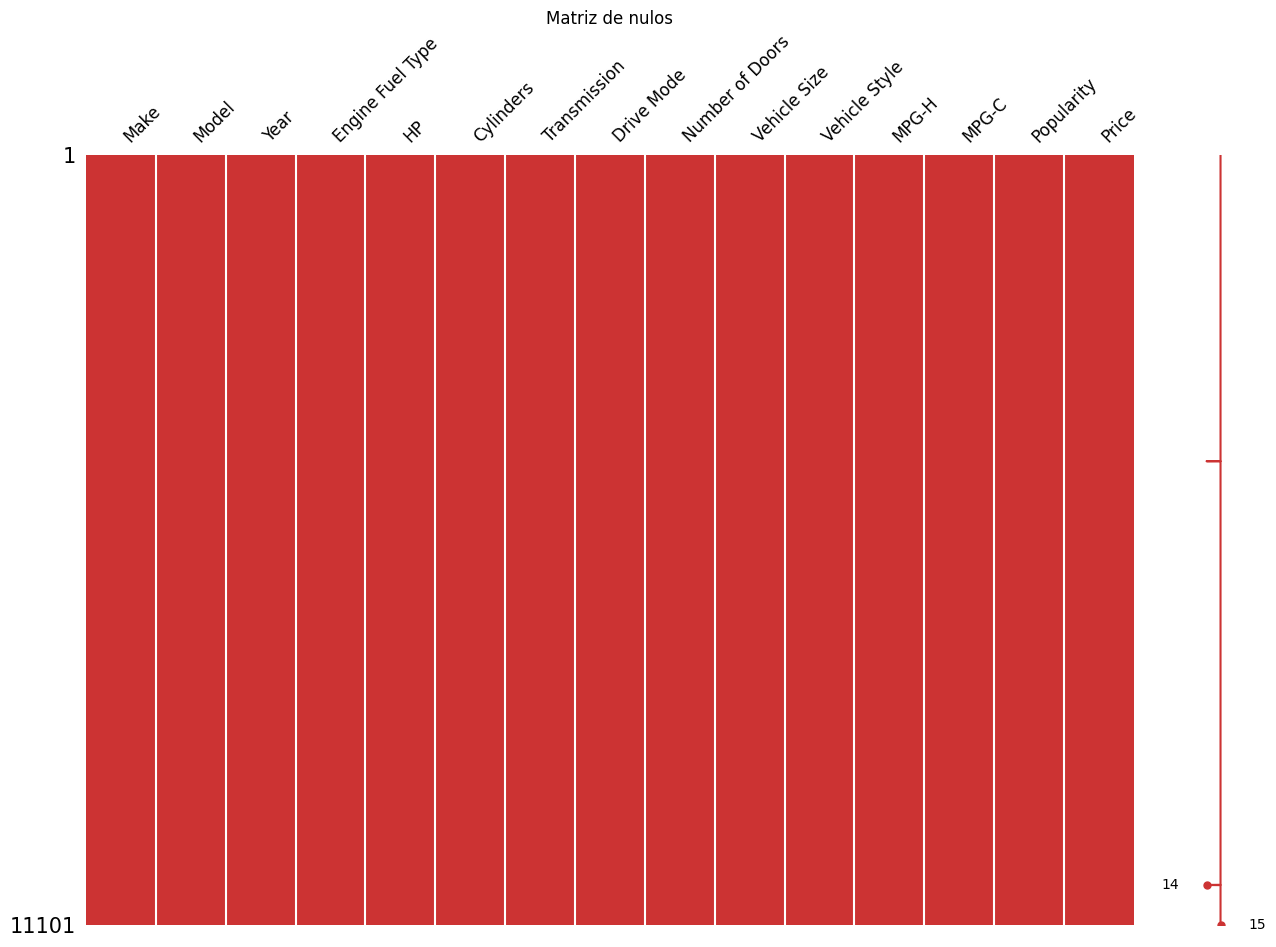

In [143]:
# Ploteamos y nos podemos dar cuenta que ya no existen valores nulos en las variables HP y Cylinders
msno.matrix(df, figsize=(15, 10), color=(0.8,0.2,0.2), fontsize=12)
plt.title("Matriz de nulos")
plt.show()

<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Detectando outliers**</font>

Un valor atípico es un punto o conjunto de puntos que son diferentes de otros puntos. A veces pueden ser muy altos o muy bajos. A menudo, es una buena idea detectar y eliminar los valores atípicos.  Cuando se quieren analizar comportamientos frecuentes y obtener información de éstos, es una buena idea eliminar los puntos atípicos. En este caso utilizaremo el rango intercuartílico para realizar la detección y eliminación de valores atípicos. No es la única forma, pero se utiliza fecuentemente. Una técnica multidimensional para eliminar puntos atípicos es [db-scan](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).  

Cuando realizamos un análisis univariado, frecuentemente, los valores atípicos se pueden ver con visualizaciones usando un `box plo`t. A continuación, se muestra el box plot de `MSRP` (`Precio`), cilindros, caballos de fuerza y tamaño del motor.

Puede probar otros también.

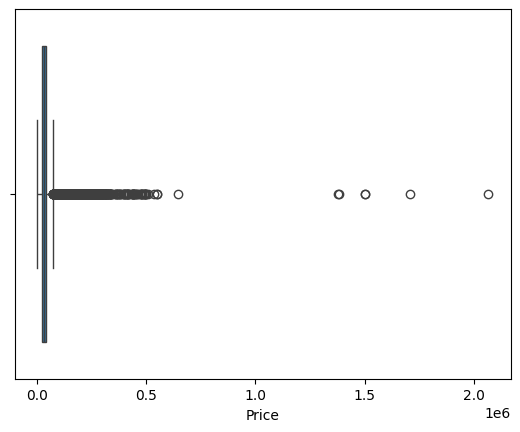

In [64]:
sns.boxplot(x=df['Price']);

# Nueva sección

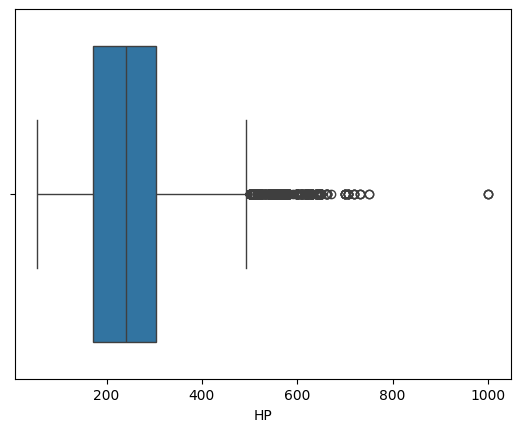

In [65]:
sns.boxplot(x=df['HP']);

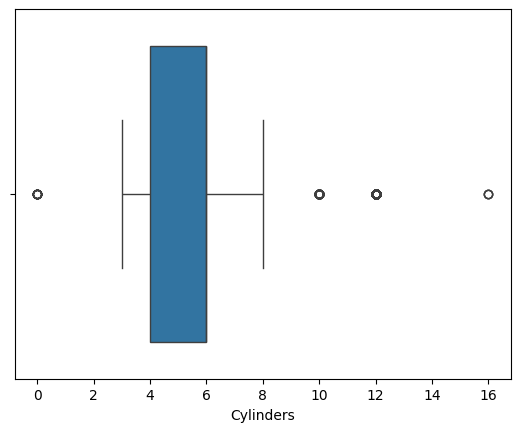

In [66]:
sns.boxplot(x=df['Cylinders']);

In [71]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular Q1, Q3 e IQR
Q1 = numeric_df.quantile(0.25)  # Q1 es una Serie
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
#IQR = Q3 - Q1
values = zip(Q1.index, Q1, Q3, IQR)
print(f'{"Atributo":20}{"Q1":>10}{"Q3":>10}{"IQR":>10}')
print('-'*50)
for i in values:
    print(f'{i[0]:20}{i[1]:10.1f}{i[2]:10.1f}{i[3]:10.1f}')

Atributo                    Q1        Q3       IQR
--------------------------------------------------
Year                    2007.0    2016.0       9.0
HP                       172.0     303.0     131.0
Cylinders                  4.0       6.0       2.0
Number of Doors            2.0       4.0       2.0
MPG-H                     22.0      30.0       8.0
MPG-C                     16.0      22.0       6.0
Popularity               549.0    2009.0    1460.0
Price                  21520.0   43020.0   21500.0


### <font color='green'>**Actividad 2 (Guiada en sala principal)**</font>
### Eliminando outliers

Elimine los puntos atípicos y desarrolle las mismas visualizaciones anteriores. Compárelas.

In [74]:
# Tu código aquí ...
# Definir los límites para detectar outliers
# Calcule el límite inferior

out_inf = Q1 - 1.5 * IQR
out_inf

,0
Year,1993.5
HP,-24.5
Cylinders,1.0
Number of Doors,-1.0
MPG-H,10.0
MPG-C,7.0
Popularity,-1641.0
Price,-10730.0


In [75]:
# Calcule el límite superior
out_sup = Q3 + 1.5 * IQR
out_sup

,0
Year,2029.5
HP,499.5
Cylinders,9.0
Number of Doors,7.0
MPG-H,42.0
MPG-C,31.0
Popularity,4199.0
Price,75270.0


In [76]:
type(out_inf)

pandas.core.series.Series

In [79]:
# Debemos alinear las columnas del DataFrame con el índice de la Serie
a1, a2 = df.align(out_inf, axis=1, copy=False)

In [80]:
# Verificamos que las columnas de 'a1' son las mismas que el indice de 'a2'
a1.columns == a2.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [81]:
# Nuestro df es ahora 'a1' lo alineamos con out_sup
a1, a3 = a1.align(out_sup, axis=1, copy=False)

In [82]:
# Todo alineado
print(a1.columns == a2.index)
print(a2.index == a3.index)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [83]:
# Generamos un nuevo DataFrame (df2) sin los outliers
df2 = df[~((a1 < a2) | (a1 > a3)).any(axis=1)]

In [84]:
# Comprobamos con Year
# En el df original (con outliers debiera darnos una valor menor al
# límite inferior (out_inf.Year)
df.Price.min()

2000

In [85]:
# En df2 no debiera ocurrir eso ..
df2.Year.min()

1994

In [86]:
# Se deberían haber eliminado ... registros
df[df.Year < out_inf.Year]['Year'].count()

466

In [87]:
# Registros eliminados
df2.count() - df.count()

,0
Make,-2486
Model,-2486
Year,-2486
Engine Fuel Type,-2486
HP,-2486
Cylinders,-2486
Transmission,-2486
Drive Mode,-2486
Number of Doors,-2485
Vehicle Size,-2486


In [88]:
# Veamos los registros por atributo
df3 = df[~((a1 < a2) | (a1 > a3))] #.any(axis=1)]
df3.count() - df.count()

,0
Make,0
Model,0
Year,-466
Engine Fuel Type,0
HP,-502
Cylinders,-309
Transmission,0
Drive Mode,0
Number of Doors,0
Vehicle Size,0


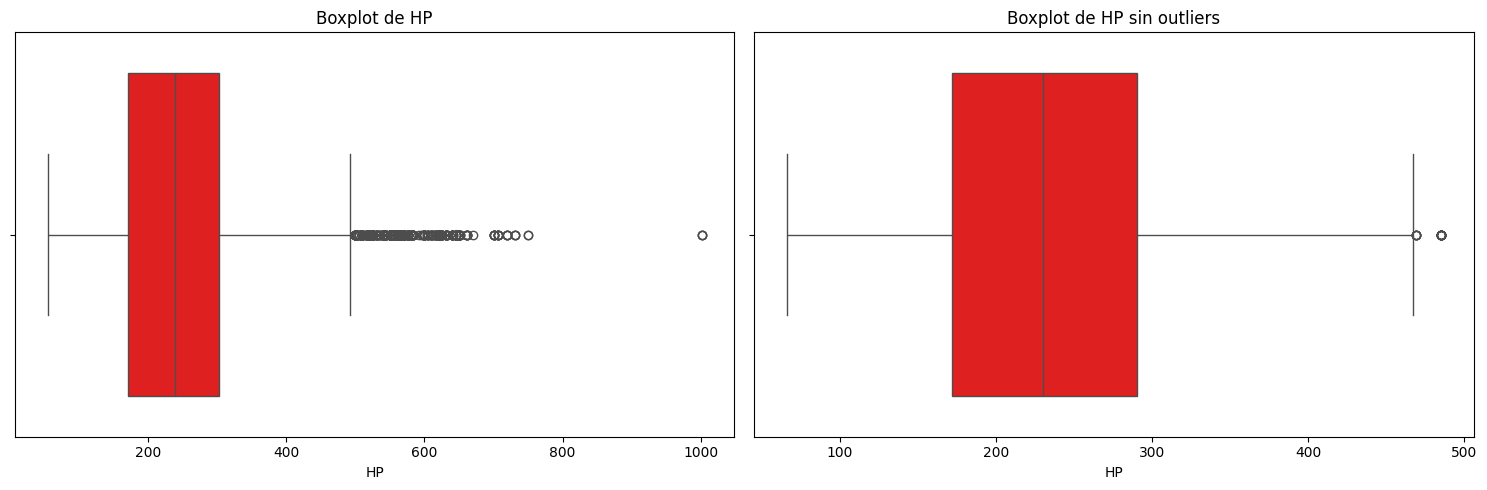

In [98]:
# Comparacion de DF antes y despues de eliminar outliers
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Primer subplot: boxplot
sns.boxplot(x=df['HP'], color='r', ax=ax[0])
ax[0].set_title("Boxplot de HP")

# Segundo subplot: boxplot
sns.boxplot(x=df2['HP'], color='r', ax=ax[1])
ax[1].set_title("Boxplot de HP sin outliers")

plt.tight_layout()
plt.show()

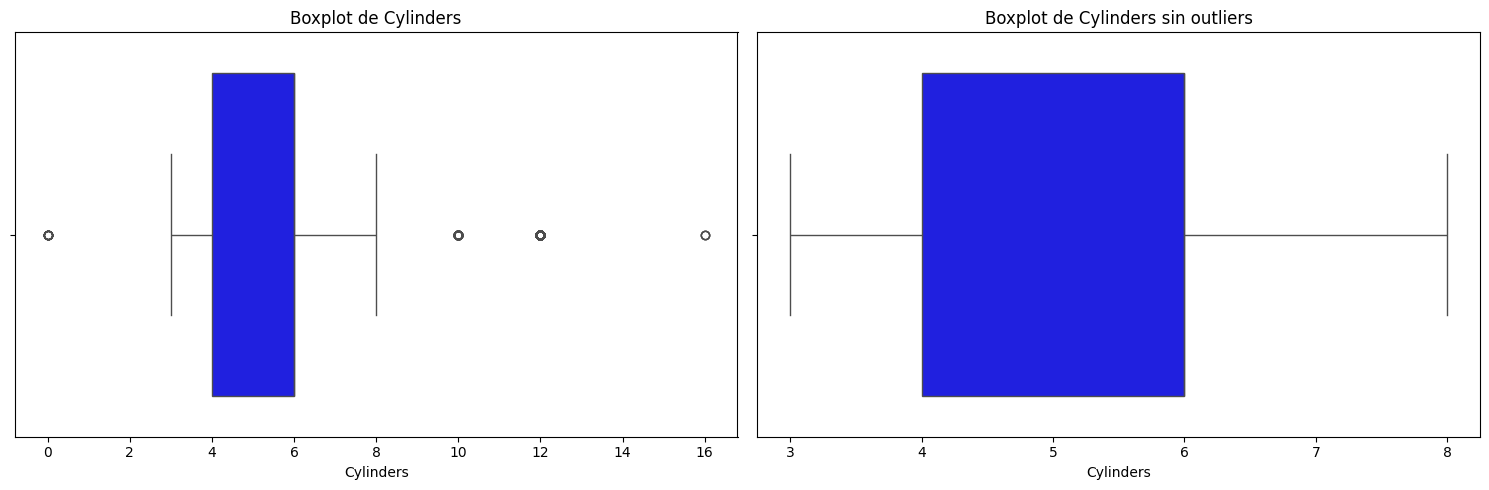

In [100]:
# Comparacion de DF antes y despues de eliminar outliers
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Primer subplot: boxplot
sns.boxplot(x=df['Cylinders'], color='b', ax=ax[0])
ax[0].set_title("Boxplot de Cylinders")

# Segundo subplot: boxplot
sns.boxplot(x=df2['Cylinders'], color='b', ax=ax[1])
ax[1].set_title("Boxplot de Cylinders sin outliers")

plt.tight_layout()
plt.show()

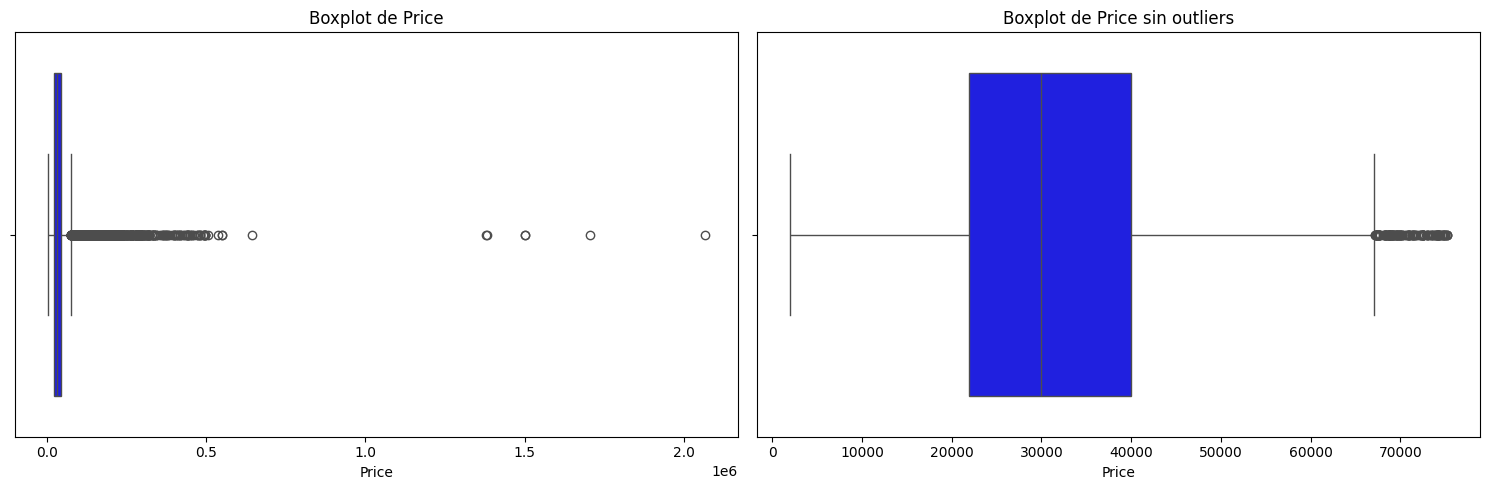

In [103]:
# Comparacion de DF antes y despues de eliminar outliers
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Primer subplot: boxplot
sns.boxplot(x=df['Price'], color='b', ax=ax[0])
ax[0].set_title("Boxplot de Price")

# Segundo subplot: boxplot
sns.boxplot(x=df2['Price'], color='b', ax=ax[1])
ax[1].set_title("Boxplot de Price sin outliers")

plt.tight_layout()
plt.show()

<img src="https://drive.google.com/uc?export=view&id=1DNuGbS1i-9it4Nyr3ZMncQz9cRhs2eJr" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='blue'>**Deconstrucción (OPCIONAL)**</font>

##<font color='red'>Explicando los __aling__ de la Actividad 2</font>

In [104]:
dfA = pd.DataFrame([[10,20,30,40], [60,70,80,90], [600,700,800,900]],
                   columns=['A', 'B', 'C', 'D'],
                   index=[2,3,4])

dfB = pd.DataFrame([[1,2,3,4], [6,7,8,9]],
                   columns=['B', 'D', 'E', 'A'],
                   index=[1,2])

DataFrame.align no combina dos DataFrames, sino que los alínea para que ambos tengan la misma configuración de fila y/o columna.

In [105]:
print(dfA)

     A    B    C    D
2   10   20   30   40
3   60   70   80   90
4  600  700  800  900


In [106]:
print(dfB)

   B  D  E  A
1  1  2  3  4
2  6  7  8  9


Alineémoslos usando columnas (`axis=1`)

In [107]:
al_1, al_2 = dfA.align(dfB, join='outer', axis=1)
print(al_1)
print()
print(al_2)

     A    B    C    D   E
2   10   20   30   40 NaN
3   60   70   80   90 NaN
4  600  700  800  900 NaN

   A  B   C  D  E
1  4  1 NaN  2  3
2  9  6 NaN  7  8


* Las columnas de `dfB` se reordenaron.
* Ambos DataFrames tienen las mismas columnas ahora.
* Ningún valor fue alterado.
* Las etiquetas de las filas no se alteraron ya que utilizamos un `align` por columnas (`axis=1`)
* Las columnas faltantes en un Dataframe respecto del otro se incluyen y se completan con `NaN`.

Podemos alinear ambas, columnas y filas:

In [108]:
al_1, al_2 = dfA.align(dfB, join='outer', axis=None)
print(al_1)
print()
print(al_2)

       A      B      C      D   E
1    NaN    NaN    NaN    NaN NaN
2   10.0   20.0   30.0   40.0 NaN
3   60.0   70.0   80.0   90.0 NaN
4  600.0  700.0  800.0  900.0 NaN

     A    B   C    D    E
1  4.0  1.0 NaN  2.0  3.0
2  9.0  6.0 NaN  7.0  8.0
3  NaN  NaN NaN  NaN  NaN
4  NaN  NaN NaN  NaN  NaN


Y podemos hacer otras operaciones, como por ejemplo, `join=inner`

In [109]:
al_1, al_2 = dfA.align(dfB, join='inner', axis=1)
print(al_1)
print()
print(al_2)

     A    B    D
2   10   20   40
3   60   70   90
4  600  700  900

   A  B  D
1  4  1  2
2  9  6  7


Lo concreto es que ahora, en nuestro ejercicio, podemos hacer operaciones entre Dataframes ya que tienen la misma estructura.

In [110]:
al_1, al_2 = dfA.align(dfB, join='outer', axis=1)
print(al_1)
print()
print(al_2)

al_1 - al_2

     A    B    C    D   E
2   10   20   30   40 NaN
3   60   70   80   90 NaN
4  600  700  800  900 NaN

   A  B   C  D  E
1  4  1 NaN  2  3
2  9  6 NaN  7  8


,A,B,C,D,E
1,NaN,NaN,NaN,NaN,NaN
2,1.0,14.0,NaN,33.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


Veamos lo que hicimos en el ejercicio al alinear un DataFrame con una Serie. Creamos una Serie `sC`

In [111]:
sC = pd.Series([15, 75, 50, 700],
                index=['A', 'B', 'C', 'D'])
sC

,0
A,15
B,75
C,50
D,700


Alineamos el Dataframe `dfA` original con la Serie `sC`

In [112]:
al_3, al_4 = dfA.align(sC, join='outer', axis=1)
print(al_3)
print()
print(al_4)


     A    B    C    D
2   10   20   30   40
3   60   70   80   90
4  600  700  800  900

A     15
B     75
C     50
D    700
dtype: int64


Los comparamos y generamos una máscara

In [113]:
al_3 < al_4

,A,B,C,D
2,True,True,True,True
3,False,True,False,True
4,False,False,False,False


Finalmente aplicamos la máscara a todo el DataFrame original (`dfA`) y creamos una nuevo DataFrame, el cual contiene solo los registros que no contienen ningún `False` (esto porque negamos la expresión con el operador `~`.

In [114]:
dfF = dfA[~(al_3 < al_4).any(axis=1)]
print('\nDataFrame original')
print(dfA)
print('\nDataFrame filtrado (simulando la eliminación de cualquier columna con outliers')
print(dfF)


DataFrame original
     A    B    C    D
2   10   20   30   40
3   60   70   80   90
4  600  700  800  900

DataFrame filtrado (simulando la eliminación de cualquier columna con outliers
     A    B    C    D
4  600  700  800  900


No confundir con el método `merge`, el cual si combina los DataFrames!!

In [115]:
dfA.merge(dfB,how='outer')

,A,B,C,D,E
0,4,1,NaN,2,3.0
1,9,6,NaN,7,8.0
2,10,20,30.0,40,NaN
3,60,70,80.0,90,NaN
4,600,700,800.0,900,NaN


<font color='red'>Fin deconstrucción Actividad 2</font>

<img src="https://drive.google.com/uc?export=view&id=1DNuGbS1i-9it4Nyr3ZMncQz9cRhs2eJr" width="50" align="left" title="Runa-perth">
<br clear="left">

<font color='green'>Fin Actividad 2</font>

## <font color='blue'>**Dibujar diferentes características entre sí (dispersión), histogramas y mapas de calor**</font>

### __Histograma__

El histograma se refiere a la frecuencia de aparición de variables en un intervalo. En este caso, hay principalmente 10 tipos diferentes de empresas de fabricación de automóviles, pero a menudo es importante saber quién tiene la mayor cantidad de automóviles. Hacer este histograma es una de las soluciones triviales que nos permite conocer el número total de automóviles fabricados por otra empresa.

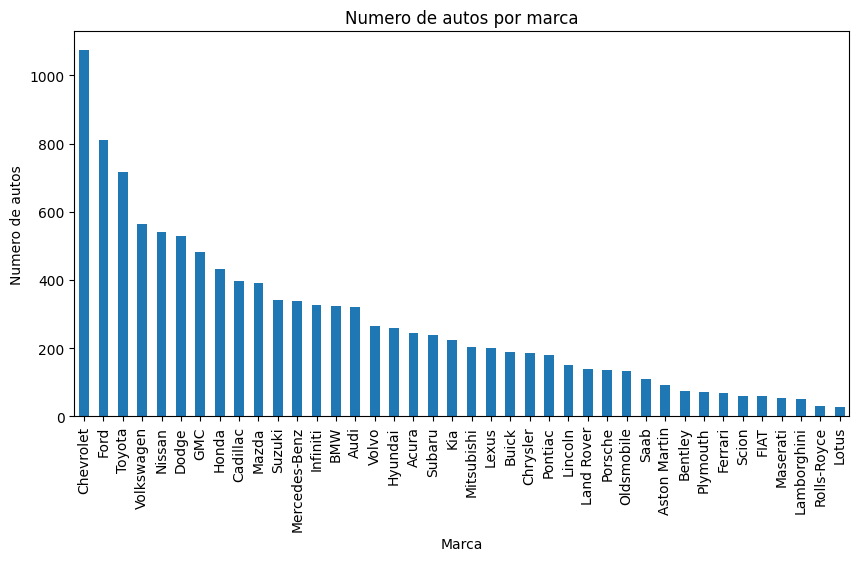

In [116]:
# Tomamos el atributo fabricante (Make)
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Numero de autos por marca")
plt.ylabel('Numero de autos')
plt.xlabel('Marca')
plt.show()

### <font color='green'>**Actividad 3**</font>

1. Construya el histograma para la variable HP. Qué puede concluir de este histograma?
2. Construya el histograma para ``df2`` (sin outliers). Compare.

TIP: Utilice distintos valores de bins

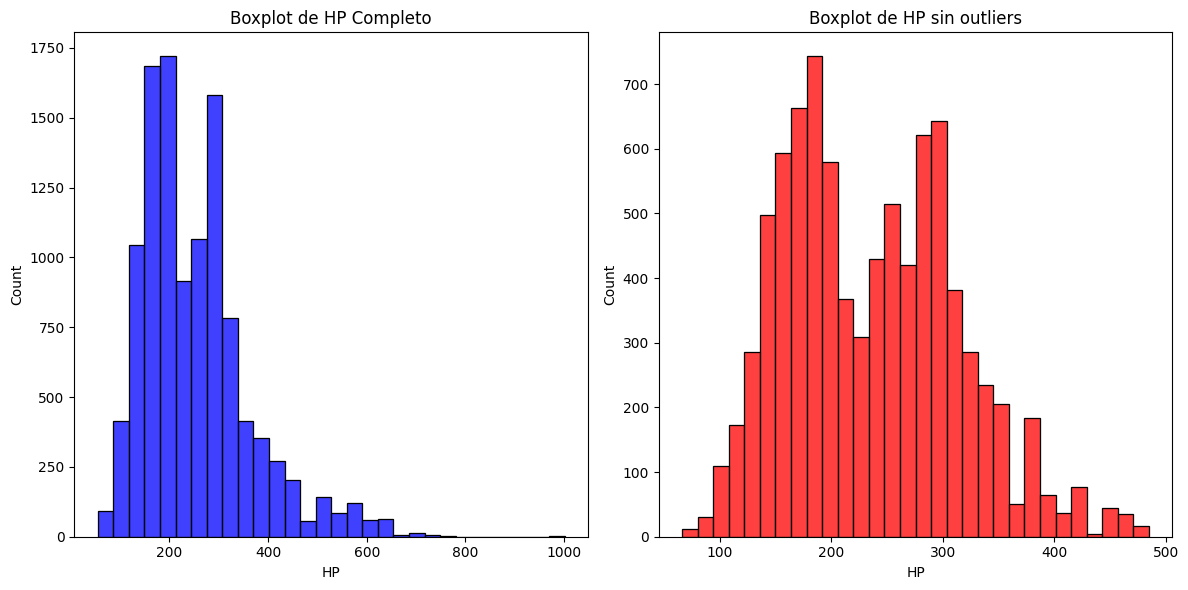

In [133]:
#Construya el histograma para la variable HP. Qué puede concluir de este histograma?
#2 Construya el histograma para df2 (sin outliers). Compare

# Crear una figura con subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Primer subplot: boxplot
sns.histplot(data=df, x="HP", ax=ax[0], bins =30, color='b')
ax[0].set_title("Boxplot de HP Completo")

# Segundo subplot: boxplot modificado
sns.histplot(data=df2, x="HP", ax=ax[1], bins =30, color='r')
ax[1].set_title("Boxplot de HP sin outliers")

# Mostrar la figura
plt.tight_layout()
plt.show()

#sns.histplot(data=df, x="HP", bins=30);

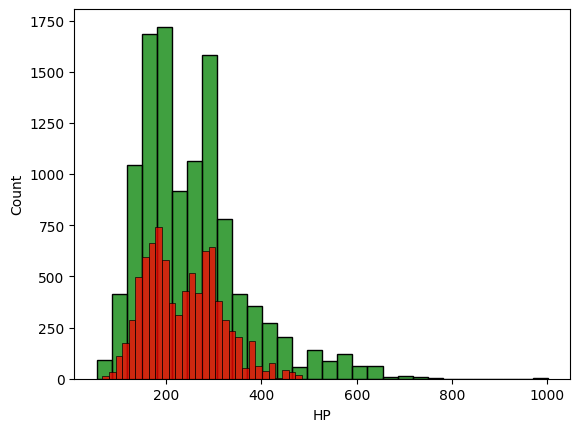

In [134]:
#Superpuesto
sns.histplot(data=df, x="HP", bins=30, color='g');
sns.histplot(data=df2, x="HP", bins=30, color='r');

* Probamos con distintos Bins y 30 fue el adecuado. Del histograma se observa que hay una distribución bimodal en la cantidad de vehiculos con HP (Uno cercano a los 300HP Y otro bajo los 200HP).
* Se logra determinar que al eliminar los outliers se facilita la visualización, se resaltan los comportamientos excepcionales, se mejora la calidad del analisis y la interpretabilidad de los datos.Claro, esto no es siempre y se debe hacer  con criterio, evaluando si se están distorcionando  los resultados o si aportan información valiosa.

<font color='green'>Fin Actividad 3</font>

### __Mapas de calor__

El mapa de calor, es un tipo de gráfico que mide la relacion entre dos variables. Es necesario utilizar este diagrama para encontrar dependencia alta entre las variables. La dependencia alta entre variables,  puede impactar el desempeño de un algoritmo de aprendizaje automático. Una de las mejores formas de encontrar la relación entre las variables se puede realizar mediante mapas de calor. En el siguiente mapa de calor, sabemos que la función de precio depende principalmente de los caballos de fuerza y los cilindros.

In [137]:
c = df.corr(numeric_only=True)
c.round(3)

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000,0.337,-0.027,0.246,0.266,0.220,0.087,0.209
HP,0.337,1.000,0.788,-0.129,-0.424,-0.475,0.042,0.659
Cylinders,-0.027,0.788,1.000,-0.148,-0.615,-0.634,0.043,0.553
Number of Doors,0.246,-0.129,-0.148,1.000,0.117,0.137,-0.059,-0.146
MPG-H,0.266,-0.424,-0.615,0.117,1.000,0.843,-0.025,-0.208
MPG-C,0.220,-0.475,-0.634,0.137,0.843,1.000,-0.007,-0.233
Popularity,0.087,0.042,0.043,-0.059,-0.025,-0.007,1.000,-0.048
Price,0.209,0.659,0.553,-0.146,-0.208,-0.233,-0.048,1.000


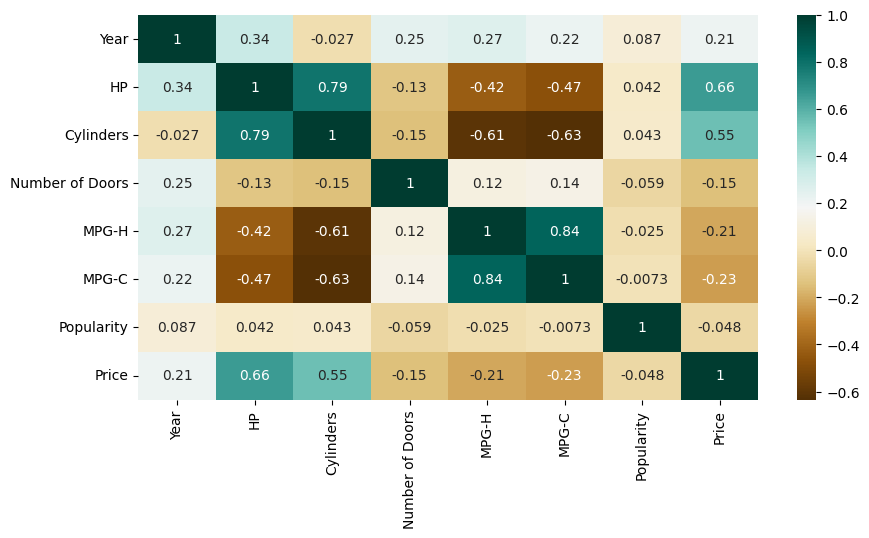

In [139]:
plt.figure(figsize=(10,5))
sns.heatmap(c,cmap="BrBG", annot=True)
plt.show()

### __Scatterplot__

Generalmente usamos diagramas de dispersión para encontrar la correlación visual entre dos variables. Aquí, los diagramas de dispersión se trazan entre Caballos de fuerza y Precio y podemos ver el diagrama a continuación. Con el gráfico que se muestra a continuación, podemos dibujar fácilmente una línea de tendencia.

Tambien se aprecia que hay dos grupos que se comportan distinto. Es probable que si quisieramos construir un predictor, estos comportamientos habria que diferenciarlos o buscar otras variables que relacionaran los puntos del grupo inferior.

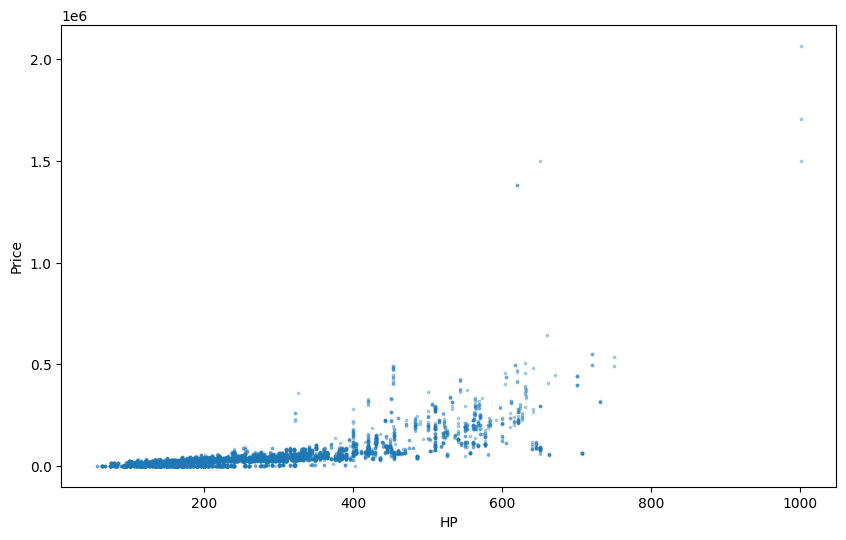

In [140]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'], alpha=0.3, s=3)
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

## <font color='purple'> __EXPERIMENTO__: </font>

### Explorar las relaciones entre el precio (Price) y otras variables numéricas (como HP, MPG-H, MPG-C) para identificar tendencias interesantes.

* Visualizar la relación entre el precio (Price) y otras variables numéricas utilizando gráficos de dispersión (scatterplots).
* Calcular la correlación de Price con otras variables numéricas para ver qué tan fuerte es la relación.

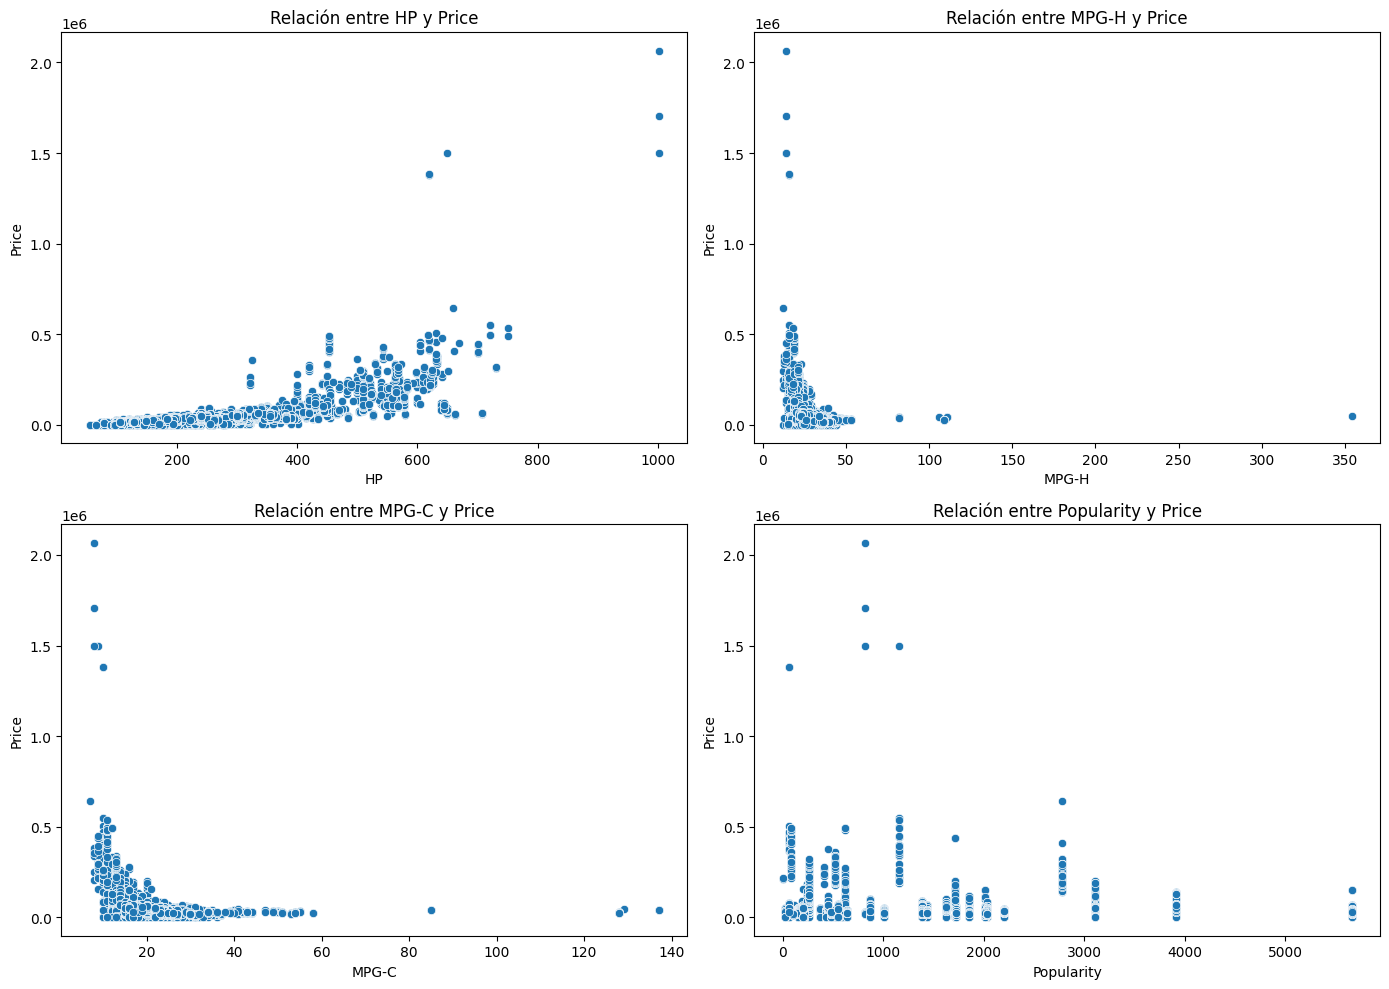

Correlaciones con 'Price':
HP            0.659437
MPG-H        -0.208084
MPG-C        -0.232927
Popularity   -0.048060
Price         1.000000
Name: Price, dtype: float64


In [157]:
# Variables de interés para la relación con 'Price'
variables = ['HP', 'MPG-H', 'MPG-C', 'Popularity']

# Crear gráficos de dispersión para cada variable frente al precio
plt.figure(figsize=(14, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[var], y=df['Price'])
    plt.title(f'Relación entre {var} y Price')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Calcular la correlación de 'Price' con otras variables
correlations = df[variables + ['Price']].corr()
print("Correlaciones con 'Price':")
print(correlations['Price'])

### <font color='purple'>Fin experimento </font>

## <font color='purple'> __MATERIAL ADICIONAL__: </font>

* Visualizacion Estadistica con Seaborn [Resumen General](https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/seaborn/)
* Python Seaborn Tutorial Para Principiantes: Empezar a visualizar datos [Resumen General 2](https://www.datacamp.com/es/tutorial/seaborn-python-tutorial)

### <font color='purple'>Fin Material Adicional </font>